# Device Enumeration and Device Configuration

In [1]:
import time

# these four imports will provide most of the functionality required in
# to start working with basler cameras
# pypylon 
import pypylon.pylon as py
# plotting for graphs and display of image
import matplotlib.pyplot as plt
# linear algebra and basic math on image matrices
import numpy as np
# OpenCV for image processing functions
import cv2

In [2]:
# get instance of the pylon TransportLayerFactory
tlf = py.TlFactory.GetInstance()

In [3]:
# all pypylon objects are instances of SWIG wrappers around the underlying pylon c++ types
tlf

<pypylon.pylon.TlFactory; proxy of <Swig Object of type 'Pylon::CTlFactory *' at 0x000001AE0EBAAFD0> >

In [4]:
devices = tlf.EnumerateDevices()

In [5]:
# list of pylon Device 
devices

(<pypylon.pylon.DeviceInfo; proxy of <Swig Object of type 'Pylon::CDeviceInfo *' at 0x000001AE40696790> >,)

In [6]:
for d in devices:
    print(d.GetModelName(), d.GetSerialNumber())

a2A1920-160ucPRO 40648144


In [7]:
# the active camera will be an InstantCamera based on a device
# created with the corresponding DeviceInfo
# this can be from a list of previously enumerated 
cam = py.InstantCamera(tlf.CreateDevice(devices[0]))

In [8]:
# or with the helper method to get the FirstDevice from an enumeration
cam = py.InstantCamera(tlf.CreateFirstDevice())

In [9]:
cam

<pypylon.pylon.InstantCamera; proxy of <Swig Object of type 'Pylon::CInstantCamera *' at 0x000001AE0FBFF2A0> >

In [10]:
# the features of the device are only accessable after Opening the device
cam.Open()

In [11]:
cam.UserSetSelector.SetValue("UserSet1")
cam.UserSetLoad.Execute()

In [12]:
print(f"Theoretical FPS: {cam.BslResultingAcquisitionFrameRate.Value}")

Theoretical FPS: 168.8048615800135


In [15]:
cam.ImageCompressionRateOption.Value

'Lossless'

In [16]:
cam.AcquisitionMode.Value

'Continuous'

In [630]:
cam.AcquisitionStart.Execute()

In [863]:
cam.BslResultingAcquisitionFrameRate.Value

168.8048615800135

In [8]:
# ===============================================================================
#    This sample illustrates how to grab and process images using the CInstantCamera class.
#    The images are grabbed and processed asynchronously, i.e.,
#    while the application is processing a buffer, the acquisition of the next buffer is done
#    in parallel.
#
#    The CInstantCamera class uses a pool of buffers to retrieve image data
#    from the camera device. Once a buffer is filled and ready,
#    the buffer can be retrieved from the camera object for processing. The buffer
#    and additional image data are collected in a grab result. The grab result is
#    held by a smart pointer after retrieval. The buffer is automatically reused
#    when explicitly released or when the smart pointer object is destroyed.
# ===============================================================================
from pypylon import pylon
from pypylon import genicam

import sys

# Number of images to be grabbed.
countOfImagesToGrab = 1000

# The exit code of the sample application.
exitCode = 0

try:
    # Create an instant camera object with the camera device found first.
    camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
    camera.Open()

    # Print the model name of the camera.
    print("Using device ", camera.GetDeviceInfo().GetModelName())

    # demonstrate some feature access
    new_width = camera.Width.Value - camera.Width.Inc
    if new_width >= camera.Width.Min:
        camera.Width.Value = new_width

    # The parameter MaxNumBuffer can be used to control the count of buffers
    # allocated for grabbing. The default value of this parameter is 10.
    camera.MaxNumBuffer.Value = 5

    # Start the grabbing of c_countOfImagesToGrab images.
    # The camera device is parameterized with a default configuration which
    # sets up free-running continuous acquisition.
    # camera.StartGrabbingMax(countOfImagesToGrab)
    camera.StartGrabbing(True)

    # Camera.StopGrabbing() is called automatically by the RetrieveResult() method
    # when c_countOfImagesToGrab images have been retrieved.

    start_time = time.time()
    # FPS update time in seconds
    display_time = 4
    fc = 0
    FPS = 0

    while camera.IsGrabbing():
        # Wait for an image and then retrieve it. A timeout of 5000 ms is used.
        grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

        # Image grabbed successfully?
        if grabResult.GrabSucceeded():
            # Access the image data.
            # print("SizeX: ", grabResult.Width)
            # print("SizeY: ", grabResult.Height)
            img = grabResult.Array
            # print("Gray value of first pixel: ", img[0, 0])
        else:
            print("Error: ", grabResult.ErrorCode, grabResult.ErrorDescription)
        grabResult.Release()

        fc += 1
        TIME = time.time() - start_time

        if (TIME) >= display_time:
            FPS = fc / (TIME)
            fc = 0
            start_time = time.time()

        fps_disp = "FPS: " + str(FPS)[:5]
        print(fps_disp)

    camera.Close()

except genicam.GenericException as e:
    # Error handling.
    print("An exception occurred.")
    print(e)
    exitCode = 1

Using device  a2A1920-160ucPRO
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS: 0
FPS

KeyboardInterrupt: 

# Features and their available attributes and functions

pylon / genicam features are of the types:

* Float
* Integer
* Bool
* Command
* String

If there are multiple instances of a features e.g. TriggerSource for each possible Trigger on a device e.g. FrameStart/LineStart/FrameBurst ....:
* Selectors are used to first select the instance e.g. FrameStart and then write to the feature


In [68]:
# Float
# the node
cam.Gain

<pypylon.genicam.IFloat; proxy of <Swig Object of type 'GENAPI_NAMESPACE::IFloat *' at 0x000002E85E157090> >

In [69]:
# Float 
# the value
cam.Gain.GetValue()

0.0

In [70]:
# abbrev get value
cam.Gain.Value

0.0

In [71]:
# set the value
cam.Gain.SetValue(15)

In [72]:
# abbrev set value
cam.Gain = 12.1

C:\Users\Bas_K\AppData\Local\Temp\ipykernel_32288\1565815661.py:2: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.Gain.Value = 12.1
  cam.Gain = 12.1


In [73]:
# the value has been updated
cam.Gain.Value

12.100011992063852

In [74]:
cam.Gain = 20

C:\Users\Bas_K\AppData\Local\Temp\ipykernel_32288\4163969725.py:1: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.Gain.Value = 20
  cam.Gain = 20


In [75]:
# Enumeration ... all values:
cam.TriggerSelector.Symbolics

('FrameBurstStart',
 'FrameBurstEnd',
 'FrameBurstActive',
 'FrameStart',
 'FrameEnd',
 'FrameActive',
 'ExposureStart',
 'ExposureEnd',
 'ExposureActive')

In [76]:
# set the value
cam.TriggerSelector = "FrameStart"
cam.LineSelector.SetValue("Line2")

C:\Users\Bas_K\AppData\Local\Temp\ipykernel_32288\2183857246.py:2: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.TriggerSelector.Value = FrameStart
  cam.TriggerSelector = "FrameStart"


In [77]:
# selector handling:
# first set selector than the dependent value:
cam.TriggerSelector = "FrameStart"
cam.TriggerSource = "Line1"

C:\Users\Bas_K\AppData\Local\Temp\ipykernel_32288\2032084399.py:3: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.TriggerSelector.Value = FrameStart
  cam.TriggerSelector = "FrameStart"
C:\Users\Bas_K\AppData\Local\Temp\ipykernel_32288\2032084399.py:4: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.TriggerSource.Value = Line1
  cam.TriggerSource = "Line1"


In [78]:
# reset to power on defaults
cam.UserSetSelector = cam.UserSetDefault.Value
cam.UserSetLoad.Execute()

C:\Users\Bas_K\AppData\Local\Temp\ipykernel_32288\118905204.py:2: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.UserSetSelector.Value = Default
  cam.UserSetSelector = cam.UserSetDefault.Value


In [79]:
cam.PixelFormat.Symbolics

('Mono8',
 'Mono10',
 'Mono10p',
 'Mono12',
 'Mono12p',
 'RGB8',
 'BGR8',
 'YCbCr422_8',
 'BayerRG8',
 'BayerRG10',
 'BayerRG10p',
 'BayerRG12',
 'BayerRG12p')

In [495]:
cam.PixelFormat = "RGB8"
# like above, alternative is the long form
cam.PixelFormat.SetValue("RGB8")

C:\Users\Bas_K\AppData\Local\Temp\ipykernel_34696\2693186627.py:1: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.PixelFormat.Value = RGB8
  cam.PixelFormat = "RGB8"


In [496]:
# grab one image with a timeout of 1s
# returns a GrabResult, which is the image plus metadata
res = cam.GrabOne(1000)

In [497]:
# the raw memory of the image
res.GetBuffer()[:100]

bytearray(b'2-\x18(*\x19,)\x15/\'\x120)\x181*\x1b.&\x1a$!\x16\'$\x19-*\x1c4-\x1b5\'\x056+\x12:/\x197,\x13.\'\x12!\x1e\x0f\x1b\x17\x00"\x1f\x00\'"\x00*$\t+"\x07("\x08"!\x05\x1f\x1f\x04\x1d\x19\x04\x1e\x19\x0e\x1e\x17\x0f!\x19\x0c%\x1f\x0c.\'\x11*#\x15!\x13\x14&')

# automatic conversion to ndarray with the Array call

In [498]:
# full method call
img = res.GetArray()
# abbrev
img = res.Array

In [499]:
res.GetArray().shape

(1200, 1920, 3)

In [500]:
img.shape

(1200, 1920, 3)

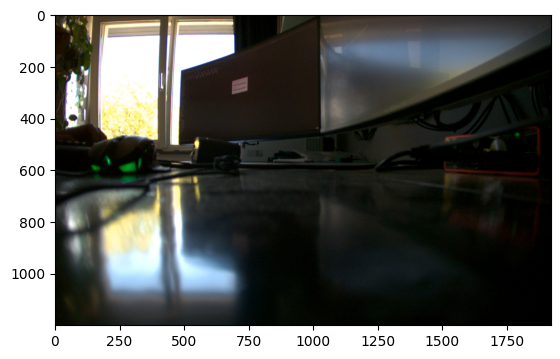

In [502]:
plt.imshow(img)

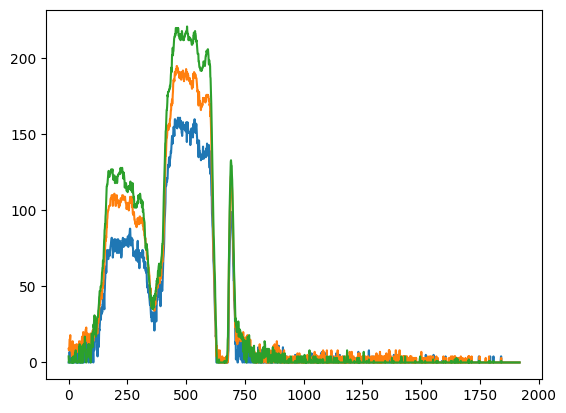

In [30]:
plt.plot(img[1000,:])

In [17]:
cam.Close()

In [37]:
img[1000,:].shape

(1920, 3)